In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil
import dynamic


In [2]:
datapath = "data/Fig3/"
figpath = "figure/Fig3/"
para18 = [0.01,0,1,0.95]
para19 = [0.01,0,1,1.1]
paras = [para18,para19]
for para in paras:    
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    if not os.path.exists(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        xx,ww=sc.draw_all(para=para,num=200,step=0.01)
        for s in range(len(xx)):
            np.savetxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s),ww[s])
    if not os.path.exists(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        x,y =  tools.jacobi_weight(para=para,if_ja=False)
        nw = np.array([x,y])
        np.savetxt(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),nw)

alpha=0.01,c=0,d=1,gamma=0.95
alpha=0.01,c=0,d=1,gamma=1.1


alpha=0.01,c=0,d=1,gamma=0.95
alpha=0.01,c=0,d=1,gamma=1.1
0 0
alpha=0.01,c=0,d=1,gamma=1.1


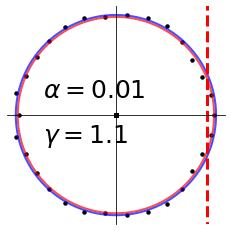

0 0
alpha=0.01,c=0,d=1,gamma=0.95


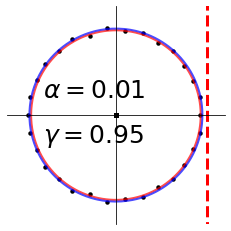

In [30]:
datapath = "data/Fig3/"
figpath = "figure/Fig3/"
para18 = [0.01,0,1,0.95]
para19 = [0.01,0,1,1.1]
paras = [para18,para19]
for para in paras:    
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    if not os.path.exists(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        xx,ww=sc.draw_all(para=para,num=200,step=0.01)
        for s in range(len(xx)):
            np.savetxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s),ww[s])
    if not os.path.exists(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        x,y =  tools.jacobi_weight(para=para,if_ja=False)
        nw = np.array([x,y])
        np.savetxt(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),nw)

paras2 = [[0.01,0,1,1.1]]
interval = 0.2
start = 0
all_xticks=[]
all_r = []
displacement = start
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print(displacement,i)
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    xx = []
    yy = []
    for s in range(4):
        if os.path.exists(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            xx.append(x)
            yy.append(y)
    xx = np.array(xx)
    yy = np.array(yy)
    all_r.append((np.max(xx)-np.min(xx))/2)
    if i>0:
        displacement = displacement+all_r[i]+all_r[i-1]+interval

    for s in range(2):
        plt.plot(xx[s]+displacement,yy[s],color=colors[s],linewidth=2,alpha=0.7)
a=np.loadtxt(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.scatter(a[0]+displacement,a[1],s=20,alpha=1,color="k",linewidth=0)
plt.text(s=r"$\alpha=${}".format(alpha),x=-0.8,y=0.2,fontsize=15/0.6)
plt.text(s=r"$\gamma=${}".format(gamma),x=-0.8,y=-0.3,fontsize=15/0.6)
plt.plot([1.0,1.0],[2,-2],color="r",linewidth=3,linestyle="--")
plt.plot()
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks([],fontsize=12)
plt.yticks([],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
# ax.spines["bottom"].set_color("none")
plt.savefig(figpath+"gamma_spectrum2.pdf")
plt.show()        
        
colors = ["r","b","saddlebrown"]
paras2 = [[0.01,0,1,0.95]]
interval = 0.2
start = 0
all_xticks=[]
all_r = []
displacement = start
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print(displacement,i)
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    xx = []
    yy = []
    for s in range(4):
        if os.path.exists(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            xx.append(x)
            yy.append(y)
    xx = np.array(xx)
    yy = np.array(yy)
    all_r.append((np.max(xx)-np.min(xx))/2)
    if i>0:
        displacement = displacement+all_r[i]+all_r[i-1]+interval

    for s in range(2):
        plt.plot(xx[s]+displacement,yy[s],color=colors[s],linewidth=2,alpha=0.7)
a=np.loadtxt(datapath+"numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.scatter(a[0]+displacement,a[1],s=20,alpha=1,color="k",linewidth=0)
plt.text(s=r"$\alpha=${}".format(alpha),x=-0.8,y=0.2,fontsize=15/0.6)
plt.text(s=r"$\gamma=${}".format(gamma),x=-0.8,y=-0.3,fontsize=15/0.6)
plt.plot([1.0,1.0],[2,-2],color="r",linewidth=3,linestyle="--")
plt.plot()
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks([],fontsize=12)
plt.yticks([],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
# ax.spines["bottom"].set_color("none")
plt.savefig(figpath+"/gamma_spectrum1.pdf")
plt.show()



alpha=0.01,c=0,d=1,gamma=0.95
alpha=0.01,c=0,d=1,gamma=1.1


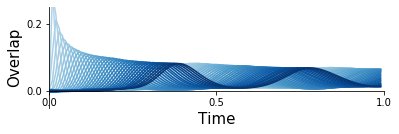

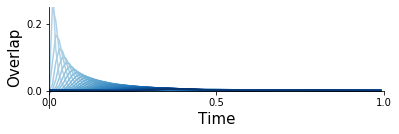

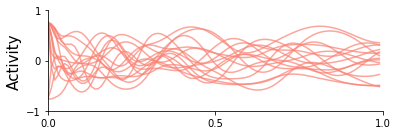

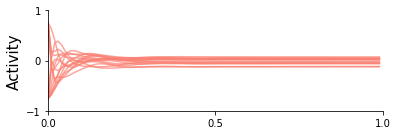

In [22]:
datapath = "data/Fig3/"
paras = [[0.01,0,1,0.95],[0.01,0,1,1.1]]
for para in paras:
    all_curve =[]
    N = 4000
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    segment=1
    diluted = 1
    clean_diag=False
    if_circulant = True
    gaussian=False
    tau = 0.01
    phi = lambda x: np.tanh(x)
    phip=lambda x: 1.0-np.tanh(x)**2
    if not os.path.exists(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        for curve in range(50):                    
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            mymodel.simulate(1.5,mymodel.pattern[0],dt=0.01)
            if curve==0:
                state_sample = mymodel.state[:20]
            overlap_activation = mymodel.overlap_activation()
            all_curve.append(overlap_activation)
        all_curve=np.array(all_curve)
        mean = np.average(all_curve,axis=0)
        np.savetxt(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),mymodel.t)
        np.savetxt(datapath+"overlapmean_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),mean)
        np.savetxt(datapath+"statesample_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),state_sample)

datapath = "data/Fig3/"
figpath = "figure/Fig3/"
paras = [[0.01,0,1,1.1],[0.01,0,1,0.95]]
for i,para in enumerate(paras):
    alpha,c,d,gamma = para
    draw_num=40
    state_num=15
    draw_time=1.0
    color = plt.get_cmap("Blues")
    if os.path.exists(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        mean = np.loadtxt(datapath+"overlapmean_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        t = np.loadtxt(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        state = np.loadtxt(datapath+"statesample_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        time = np.argmin(np.abs(t-draw_time))
        fig = plt.figure

        for i in range(draw_num):
            plt.plot(t[:time],mean[i][:time],color=color(0.3+i*(0.7/draw_num)))
        plt.ylim(-0.05,0.25)
        plt.xlim(0,1)
        plt.xlabel("Time",fontsize=15)
        plt.ylabel("Overlap",fontsize=15)
        ax = plt.gca()
        ax.set_aspect(1)
        plt.xticks([0.0,0.5,1.0])
        plt.yticks([0.2,0.0])
        ax.spines["right"].set_color("none")
        ax.spines["top"].set_color("none")
        ax.spines['bottom'].set_position(('data', 0))
        plt.savefig(figpath+"overlap{}.pdf".format(i+1))
        plt.show()
        
paras = [[0.01,0,1,1.1],[0.01,0,1,0.95]]
for i,para in enumerate(paras):
    alpha,c,d,gamma = para
    draw_num=40
    state_num=15
    draw_time=1.0
    color = plt.get_cmap("Blues")
    if os.path.exists(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        mean = np.loadtxt(datapath+"overlapmean_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        t = np.loadtxt(datapath+"t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        state = np.loadtxt(datapath+"statesample_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        time = np.argmin(np.abs(t-draw_time))
        fig = plt.figure

        for i in range(state_num):
            plt.plot(t[:time],np.tanh(state[i][:time]),color="salmon",alpha=0.7)
        plt.ylabel("Activity",fontsize=15)
        ax = plt.gca()
        ax.set_aspect(0.3/2)
        plt.xticks([0.0,0.5,1.0])
        plt.yticks([1,0,-1])
        plt.xlim(0,1.0)
        plt.ylim(-1,1)
        ax.spines["right"].set_color("none")
        ax.spines["top"].set_color("none")
        ax.spines['bottom'].set_position(('data', -1))
        plt.savefig(figpath+"activity{}.pdf".format(i+1))
        plt.show()

alpha=0.01,c=0,d=1,gamma=1.1
alpha=0.01,c=0,d=1,gamma=0.95


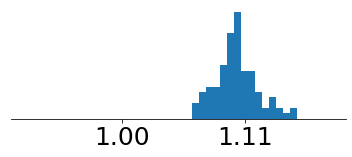

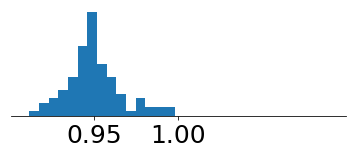

In [31]:
datapath = "data/Fig3/"
figpath = "figure/Fig3/"
paras = [[0.01,0,1,1.1],[0.01,0,1,0.95]]
for para in paras: 
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    if not os.path.exists(datapath+"maxeigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        all_max_eigen = []
        for i in range(100):
            print(i)
            alpha,c,d,gamma=para
            x,y=tools.jacobi_weight(para=para,var=1,N=4000)
            all_max_eigen.append(np.max(x))
        np.savetxt(datapath+"maxeigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array(all_max_eigen))
        
para = [0.01,0,1,1.1]
alpha,c,d,gamma=para
max_eigen = np.loadtxt(datapath+"maxeigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.hist(max_eigen,density=True,bins=15)
plt.xticks([1.0,round(gamma*np.sqrt(1+alpha),2)],fontsize=15/0.6)
plt.yticks([])
plt.xlim(0.9,1.2)
ax = plt.gca()
ax.set_aspect(0.003)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_color("none")
plt.savefig(figpath+"max_eigen_distribution1.pdf")
plt.show()


para = [0.01,0,1,0.95]
alpha,c,d,gamma=para
max_eigen = np.loadtxt(datapath+"maxeigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.hist(max_eigen,density=True,bins=15)
plt.xticks([1.0,round(gamma*np.sqrt(1+alpha),2)],fontsize=15/0.6)
plt.yticks([])
plt.xlim(0.9,1.1)
ax = plt.gca()
ax.set_aspect(0.0015)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines['left'].set_color("none")
plt.savefig(figpath+"max_eigen_distribution2.pdf")
plt.show()

alpha=0.01,c=0,d=1,gamma=0.5
alpha=0.01,c=0,d=1,gamma=0.5236842105263158
alpha=0.01,c=0,d=1,gamma=0.5473684210526316
alpha=0.01,c=0,d=1,gamma=0.5710526315789474
alpha=0.01,c=0,d=1,gamma=0.5947368421052631
alpha=0.01,c=0,d=1,gamma=0.618421052631579
alpha=0.01,c=0,d=1,gamma=0.6421052631578947
alpha=0.01,c=0,d=1,gamma=0.6657894736842105
alpha=0.01,c=0,d=1,gamma=0.6894736842105262
alpha=0.01,c=0,d=1,gamma=0.7131578947368421
alpha=0.01,c=0,d=1,gamma=0.7368421052631579
alpha=0.01,c=0,d=1,gamma=0.7605263157894737
alpha=0.01,c=0,d=1,gamma=0.7842105263157895
alpha=0.01,c=0,d=1,gamma=0.8078947368421052
alpha=0.01,c=0,d=1,gamma=0.831578947368421
alpha=0.01,c=0,d=1,gamma=0.8552631578947367
alpha=0.01,c=0,d=1,gamma=0.8789473684210526
alpha=0.01,c=0,d=1,gamma=0.9026315789473685
alpha=0.01,c=0,d=1,gamma=0.9263157894736842
alpha=0.01,c=0,d=1,gamma=0.95


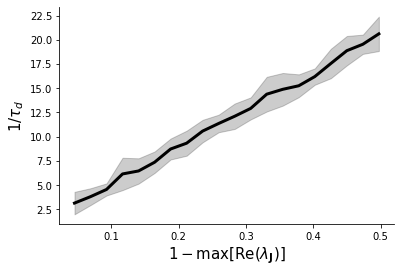

In [37]:
gammas = np.linspace(0.5,0.95,num=20)
for gamma in gammas:
    alpha=0.01
    c=0
    d=1
    simulate_time=1.5
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    all_curve =[]
    N = 4000
    
    segment=1
    diluted = 1
    clean_diag=False
    if_circulant = True
    gaussian=False
    tau = 0.01
    phi = lambda x: np.tanh(x)
    phip=lambda x: 1.0-np.tanh(x)**2
    
    if not os.path.exists(datapath+"dynamic_timescale_t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        np.savetxt(datapath+"dynamic_timescale_t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.linspace(0,simulate_time,num=int(simulate_time*100),endpoint=True))
        for curve in range(20):           
            para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(para)
            mymodel.simulate(simulate_time,mymodel.pattern[0],dt=0.01)
            overlap_activation = mymodel.overlap_activation()
            m_average = np.sum(overlap_activation,axis=0)
            np.savetxt(datapath+"dynamic_timescale_coverlapmean_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,curve),m_average)
        
gammas = np.linspace(0.5,0.95,num=20)
allall_timescale1=[]
allall_timescale2=[]
allall_timescale3=[]
for i,gamma in enumerate(gammas):
    if i>=0:
        alpha=0.01
        c=0
        d=1
#         print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
        t = np.loadtxt(datapath+"dynamic_timescale_t_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        all_timescale1=[]
        all_timescale2=[]
        all_timescale3=[]
        for curve in range(20):
            m = np.loadtxt(datapath+"dynamic_timescale_coverlapmean_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,curve))
            all_timescale1.append(t[np.argmin(np.abs(m-1.0/np.e*m[0]))])
            all_timescale2.append(t[np.argmin(np.abs(m-1.0/5*m[0]))])
            all_timescale3.append(t[np.argmin(np.abs(m-1.0/10*m[0]))])
        allall_timescale1.append(all_timescale1)
        allall_timescale2.append(all_timescale2)
        allall_timescale3.append(all_timescale3)
time1 = np.array(allall_timescale1)
time2 = np.array(allall_timescale2)
time3 = np.array(allall_timescale3)
y1 = np.average(1/time1,axis=1)
std_y1 = np.std(1/time1,axis=1)
y2 = np.average(1/time2,axis=1)
std_y2 = np.std(1/time2,axis=1)
y3 = np.average(1/time3,axis=1)
std_y3 = np.std(1/time3,axis=1)
# plt.plot(1-gammas*np.sqrt(1+alpha),y1,color="firebrick",linewidth=3,label="e")
# plt.plot(1-gammas*np.sqrt(1+alpha),y2,color="g",linewidth=3,label="5")
plt.plot(1-gammas*np.sqrt(1+alpha),y3,color="k",linewidth=3,label="10")
# plt.fill_between(1-gammas*np.sqrt(1+alpha),y1-std_y1,y1+std_y1,alpha=0.2,color="firebrick")
# plt.fill_between(1-gammas*np.sqrt(1+alpha),y2-std_y2,y2+std_y2,alpha=0.2,color="g")
plt.fill_between(1-gammas*np.sqrt(1+alpha),y3-std_y3,y3+std_y3,alpha=0.2,color="k")
plt.xlabel(r"$1-\max\left[\operatorname{Re}(\lambda_{\mathbf{J}})\right]$",fontsize=15)
plt.ylabel(r"$1/\tau_d$",fontsize=15)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# plt.legend(frameon=False,fontsize=15)

plt.savefig(figpath+"decay_timescale.pdf") 

In [55]:
# Example code
# Find the threshold gamma when alpha=0.1,c=0,d=1
alpha,c,d=[0.1,0,1]
numerical_result=sc.chaos_boundary_finder(alpha,c,d,gamma0=0.5,gamma1=1.5,step=0.005,x1=10,x0=-1)
theoretical_result = 1.0/np.sqrt(alpha+1)
print("Numerical solution:{}".format(numerical_result))
print("Analytical solution:{}".format(theoretical_result))

boundary0.5244249273431942,G1.9068896761836407
-0.47557507265680576
boundary1.5732747820039021,G0.6356298920607195
0.5732747820039021
boundary1.0488498547047322,G0.9534448380926144
0.04884985470473224
boundary0.7866373910115828,G1.2712597841221802
-0.2133626089884172
boundary0.9177436228567459,G1.089651243533857
-0.08225637714325407
boundary0.9832967387803828,G1.0170078272985275
-0.016703261219617183
boundary1.0160732967424713,G0.9842011231922498
0.016073296742471266
boundary0.9996850177517868,G1.0003355678342232
-0.00031498224821324694
boundary1.0078791572543544,G0.992202758340236
0.007879157254354396
boundary1.0037820874996253,G0.9962525655166721
0.003782087499625275
boundary1.001733552647888,G0.9982898918275049
0.0017335526478881036
boundary1.000709285203935,G0.9993116829139629
0.000709285203934984
Numerical solution:0.9541015625
Analytical solution:0.9534625892455922


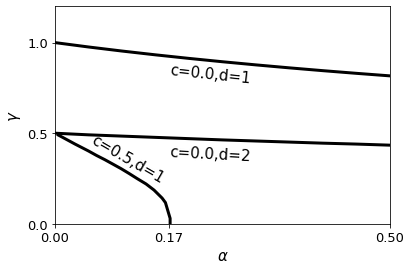

In [42]:
plt.plot(np.loadtxt(datapath+"c_05_d_1_alpha.csv"),np.loadtxt(datapath+"c_05_d_1_gamma.csv"),label="c=0.5,d=1" ,color="k",linewidth=3)
plt.text(s="c=0.5,d=1",x=0.05,y=0.23,fontsize=15,rotation=-30,color="k")
plt.plot(np.loadtxt(datapath+"c_0_d_2_alpha.csv"),np.loadtxt(datapath+"c_0_d_2_gamma.csv") ,label="c=0.0,d=2",color="k",linewidth=3)
plt.text(s="c=0.0,d=1",x=0.17,y=0.78,fontsize=15,rotation=-6,color="k")
plt.plot(np.loadtxt(datapath+"c_0_d_2_alpha.csv"),1.0/np.sqrt(np.loadtxt(datapath+"c_0_d_2_alpha.csv")+1.0),label="c=0.0,d=1",color="k",linewidth=3)
plt.text(s="c=0.0,d=2",x=0.17,y=0.35,fontsize=15,rotation=-3,color="k")

plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$\gamma$",fontsize=15)
plt.xticks([0.0,0.17,0.5],fontsize=13)
plt.yticks([0.00,0.50,1.00],fontsize=13)
plt.ylim(0,1.2)
plt.xlim(0,0.5)
# ax=plt.gca()
# ax.spines["right"].set_color("none")
# ax.spines["top"].set_color("none")

plt.savefig(figpath+"zero_fixed_point_chaos_boundary.pdf")
